In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [3]:
import os
import sys
sys.path.append(
    os.path.normpath(
        os.path.join(os.getcwd(), '..')))

In [4]:
from src.objects import CameraView
from src.datasets.matterport3d.data import Matterport3dDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [5]:
paths = Matterport3dDataPaths(
    data_root='/Users/artonson/tmp/s4g/matterport/',
    scene_id='D7N2EKCX4Sj',
    room_id='9',
    chunk_id='*',
    type_id='cmp'
)

In [6]:
paths.get_extrinsics_filename('0')

'/Users/artonson/tmp/s4g/matterport/images/D7N2EKCX4Sj/camera/0.txt'

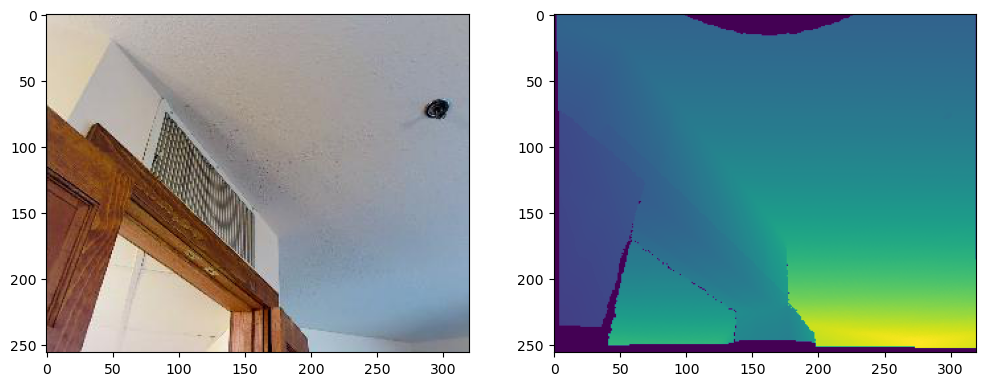

In [7]:
camera_view = CameraView.from_paths(paths, '5')

f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [8]:
camera_view.intrinsics

array([[268.367,   0.   , 157.355,   0.   ],
       [  0.   , 268.615, 126.59 ,   0.   ],
       [  0.   ,   0.   ,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

In [9]:
camera_view.line_length = 0.1

In [10]:
point_view = unproject_rgbd(camera_view)

In [11]:
point_view.depth

array([[ 9.24884816, -1.12590985,  2.39709254],
       [ 9.24770183, -1.12900947,  2.3971425 ],
       [ 9.24716542, -1.13170908,  2.39820072],
       ...,
       [10.77291378, -3.9040982 ,  2.35771156],
       [10.76716166, -3.91050735,  2.35688313],
       [10.76063279, -3.91596826,  2.35572878]])

In [12]:
_ = display_3d(
    PointsPlottable(
        points=point_view.depth,
        point_size=0.01,
        point_colors=rgb_to_packed_colors(
            point_view.rgb[:, 0],
            point_view.rgb[:, 1],
            point_view.rgb[:, 2],
        ),
    ),
    point_view,
    height=1024
)

/Users/artonson/miniconda3/envs/py38_dev/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
/Users/artonson/miniconda3/envs/py38_dev/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "uint32". A coerced copy has been created.
  warnings.warn(


Output()

In [93]:
from src.objects import CameraView
from src.datasets.scannet.data import ScannetDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [94]:
paths = ScannetDataPaths(
    data_root='/Users/artonson/tmp/s4g/scannet/',
    scene_id='scene0475',
    room_id='00',
    chunk_id='*',
    type_id='cmp'
)

In [95]:
!ls -lah {paths.get_extrinsics_filename('0')}

-rw-r--r--  1 artonson  staff   150B Nov  2 14:38 /Users/artonson/tmp/s4g/scannet/scannet_re/scene0475_00/pose/0.txt


/Users/artonson/repos/frustum_chunk_intersection/src/objects.py:76: UserWarning: Resizing RGB from (968, 1296, 3) to (480, 640)
  warnings.warn(f'Resizing RGB from {str(rgb_array.shape)} '


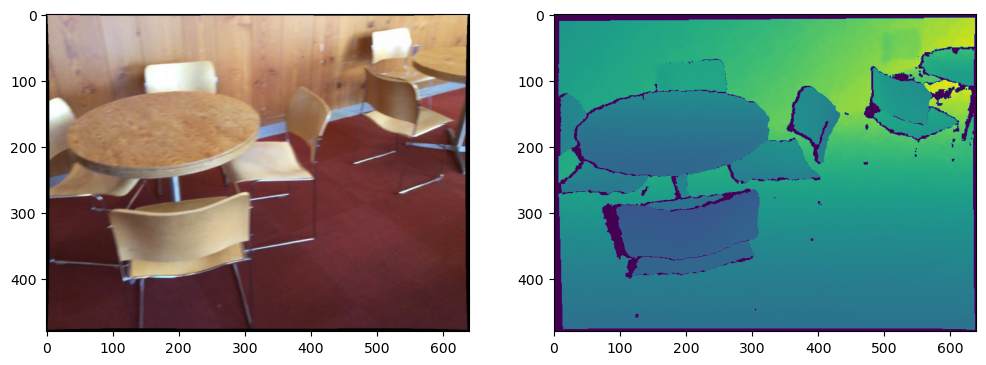

In [110]:
camera_view = CameraView.from_paths(paths, '40', resize_rgb_to_depth=True)

f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [107]:
camera_view.rgb.dtype

dtype('uint8')

In [108]:
from skimage.transform import resize
camera_view.rgb = resize(
    camera_view.rgb, 
    camera_view.depth.shape,
    anti_aliasing=True,
    preserve_range=True).astype(np.uint8)

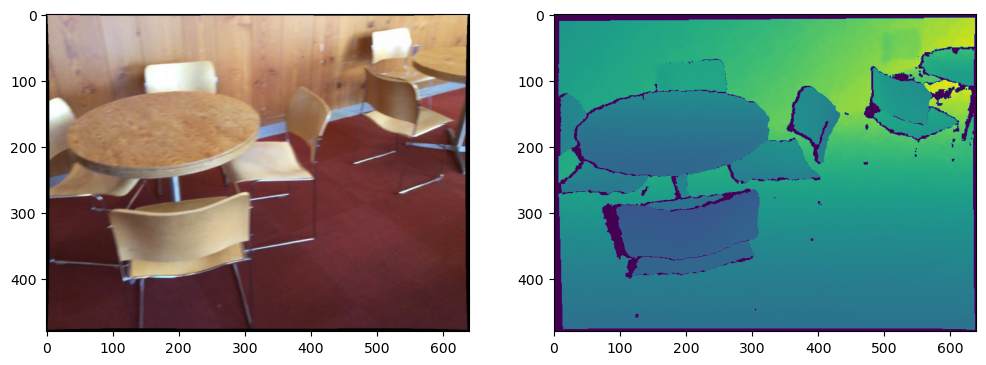

In [109]:
f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [101]:
camera_view.line_length = 0.1

In [102]:
point_view = unproject_rgbd(camera_view)

In [103]:
point_view.depth

array([[6.76573956, 5.65609515, 0.85047982],
       [6.77858053, 5.61648286, 0.84384822],
       [6.78125666, 5.59727262, 0.84117198],
       ...,
       [5.01235514, 8.07253842, 0.09269411],
       [5.01045835, 8.06950976, 0.09185874],
       [5.00855926, 8.06647843, 0.09102331]])

In [104]:
_ = display_3d(
    PointsPlottable(
        points=point_view.depth,
        point_size=0.01,
        point_colors=rgb_to_packed_colors(
            point_view.rgb[:, 0],
            point_view.rgb[:, 1],
            point_view.rgb[:, 2],
        ),
    ),
    point_view,
    height=1024
)

Output()